In [2]:
import config
#DB instance creation
import mysql.connector
from mysql.connector import errorcode
import requests
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

%matplotlib inline

In [3]:
def connect_to_db():
    cnx = mysql.connector.connect(
    host=config.host, user=config.user, passwd=config.password, database=config.DB_NAME)
    cursor = cnx.cursor()
    return cnx, cursor


In [4]:
#helper method, executes a sql query and returns the fetchall results
def execute_query(query):
    cnx, c = connect_to_db()
    c.execute(query)
    result = c.fetchall()
    #close
    c.close()
    cnx.close()
    return result

In [5]:
#creates pd dataframe with descriptive columns, after passed a cursor that aboutto be fetchall-ed
def create_df_from_cursor(cursor):
    df = pd.DataFrame(cursor.fetchall())
    df.columns = [i[0] for i in cursor.description]
    return df

def execute_query_into_df(query):
    cnx, c = connect_to_db()
    c.execute(query)
    result = create_df_from_cursor(c)
    #close
    c.close()
    cnx.close()
    return result

In [6]:
def get_genres_from_db():
    cnx, cursor = connect_to_db()
    query = """SELECT * 
                FROM genres"""
    cursor.execute(query)
    return cursor.fetchall()

# get_genres_from_db()

In [7]:

def convert_list_from_tuples(tuple_list):
    """The movie titles are retrieved as a list of tupes, 
    return instead a list with just the title from the first half of each tuple"""
    title_list = []
    for item in tuple_list:
        title_list.append(item[0])
    return title_list
    

def get_all_movie_info():
    select_q = """
                SELECT *
                FROM movies
                """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    cnx.close()
    c.close()
    return results

def get_movie_names():
    name_q = """
            SELECT title
            FROM movies"""
    cnx, c = connect_to_db()
    c.execute(name_q)
    results = c.fetchall()
    cnx.close()
    c.close()
    title_list = convert_list_from_tuples(results) 
    return title_list

# get_movie_names()
    

In [8]:
######SQL QUERIES#########

def get_most_popular_movie():
    q = """SELECT * 
            FROM movies
            ORDER BY popularity DESC
            LIMIT 5
        """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    cnx.close()
    c.close()
    return results

get_most_popular_movie()

def get_genre_counts():
    q = """SELECT genres.name AS genre_name, COUNT(*) 
        FROM genre_instances
        JOIN genres
        USING (genre_id)
        GROUP BY genre_instances.genre_id
    """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    c.close()
    cnx.close()
    return results

# get_genre_counts()

In [9]:
def get_most_popular_genres():
    q = """
        SELECT genres.name, AVG(popularity) AS avg_popularity
        FROM genre_instances
        JOIN genres 
        USING (genre_id)
        JOIN movies
        USING (movie_id)
        GROUP BY genre_id
        ORDER BY avg_popularity DESC;
        """
    return execute_query(q)

# get_most_popular_genres()

In [10]:
def get_most_popular_director():
    q  = """
         SELECT director, AVG(popularity) AS avg_popularity
         FROM genre_instances
         JOIN genres 
         USING (genre_id)
         JOIN movies
         USING (movie_id)
         GROUP BY director
         ORDER BY avg_popularity DESC
         LIMIT 12;
         """
    return execute_query(q)

In [11]:
def get_most_profitable_director():
    q  = """
         SELECT director, AVG(box_office) AS avg_revenue
         FROM genre_instances
         JOIN genres 
         USING (genre_id)
         JOIN movies
         USING (movie_id)
         GROUP BY director
         ORDER BY avg_revenue DESC
         LIMIT 12;
         """
    return execute_query(q)

In [12]:
def get_movies_table():
    q = """
        SELECT * 
        FROM movies
        ORDER BY popularity DESC
        """
    return execute_query(q)

In [13]:
def get_genres_table():
    q = """
         SELECT genres.name, 
         COUNT(*) as number_of_movies
         FROM genres
         JOIN genre_instances
         USING(genre_id)
         GROUP BY genre_id
         ORDER BY number_of_movies DESC;
        """
    return execute_query(q)
    

In [14]:
def get_num_movie_director():
    q = """
        SELECT director, COUNT(*) as num_of_titles
        FROM movies
        WHERE director IS NOT NULL
        GROUP BY director
        ORDER BY num_of_titles DESC;
        """
    return execute_query(q)


In [15]:
def reviews_per_genre():
    q = """
        SELECT genres.name, 
        AVG(vote_count) AS avg_reviews
        FROM genre_instances
        JOIN genres 
        USING (genre_id)
        JOIN movies
        USING (movie_id)
        GROUP BY genres.name
        ORDER BY avg_reviews DESC;
        """
    return execute_query(q)

In [16]:
def box_office_vote_count():
    q = """
        SELECT title, vote_count, box_office
        FROM movies
        WHERE box_office IS NOT NULL
        ORDER BY vote_count;
        """
    return execute_query(q)

In [17]:
# popular_tuple = get_most_popular_genres()
# genres = [item[0] for item in popular_tuple]
# avg_pop = [item[1] for item in popular_tuple]

def bar_chart(x, y, xlabel=None, ylabel=None, title=None):
    """This function creates bar charts. It must recieve the x and y values to plot.
       optional insertions are: add xlabel, ylabel and title."""
    plt.figure(figsize=(10,6))
    plt.bar(x, y, align='center', alpha=0.5)
    #give the x ticks a slight rotation in case the data is highly populated
    plt.xticks(x, rotation=70)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    return

bar_chart(genres, avg_pop, 
          'Genres', 'Average Popularity', 
          'Average Popularity For Every Genre')

NameError: name 'genres' is not defined

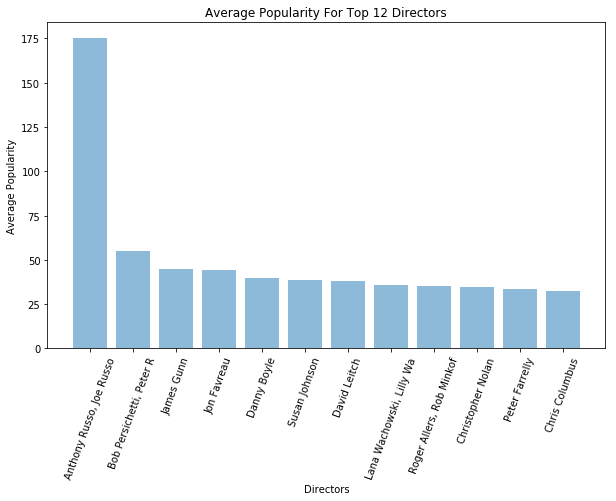

In [18]:
query = get_most_popular_director()
director = [item[0] for item in query]
popu = [item[1] for item in query]


# bar_chart(x, y, xlabel=None, ylabel=None, title=None)
bar_chart(director, popu, 
          'Directors', 'Average Popularity', 
          'Average Popularity For Top 12 Directors')

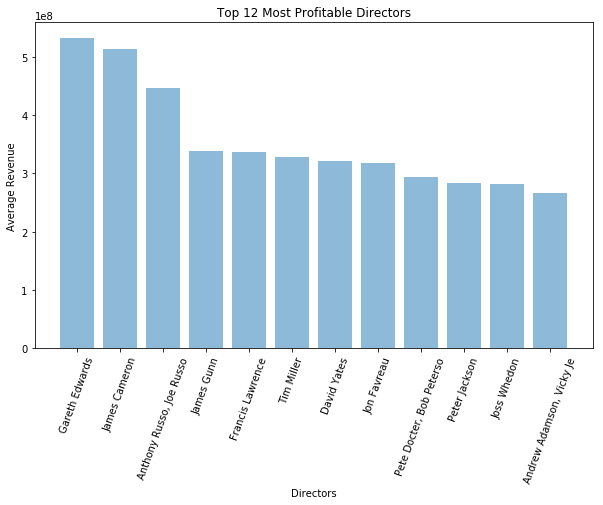

In [19]:
tupples = get_most_profitable_director()
director = [item[0] for item in tupples]
rev = [item[1] for item in tupples]

bar_chart(director, rev, 
          'Directors', 'Average Revenue', 
          'Top 12 Most Profitable Directors')

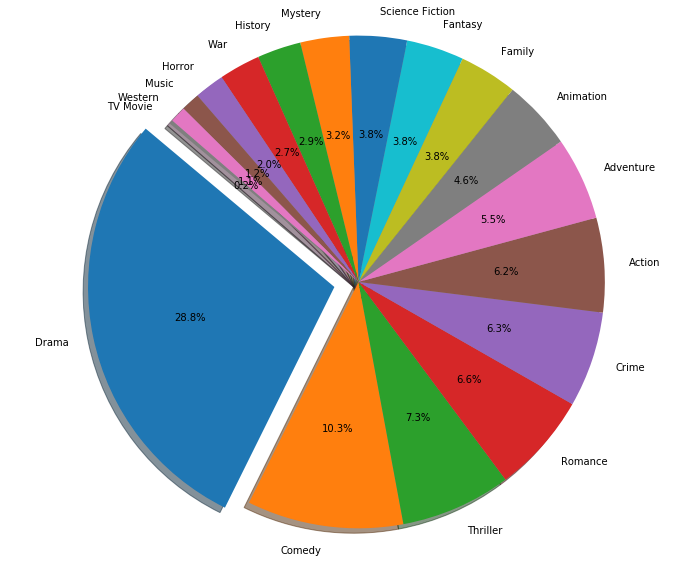

In [20]:
# genre pie chart
genres_tupple = get_genres_table()
genres = [item[0] for item in genres_tupple]
num_of_movies = [item[1] for item in genres_tupple]

def create_pie(labels, sizes):
    """This function creates a pie chartsgive the labels and their sizes,"""
    labels = labels
    sizes = sizes
    explode_size = len(labels)
    zero_list = [0.1] + [0] * (explode_size-1)
    explode = tuple(zero_list)  # cut the 1st slice
    # Plot
    plt.figure(figsize=(12,10))
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    
create_pie(genres, num_of_movies)

[[1.         0.77972625]
 [0.77972625 1.        ]]


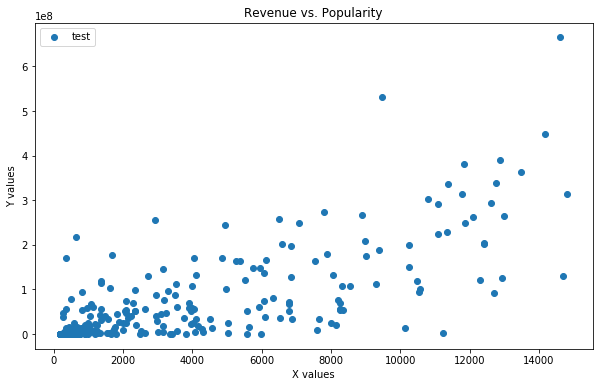

In [43]:
import numpy as np

# query_tuple = get_movies_table()
query_tuple = box_office_vote_count()

title = [item[1] for item in query_tuple]
# popu = [item[2] for item in query_tuple]
# re_date = [item[3] for item in query_tuple]
vote_count = [item[1] for item in query_tuple]
# vote_avg = [item[5] for item in query_tuple]
# title_length = [len(item) for item in title]
# director = [item[6] for item in query_tuple]
revenue = [item[2] for item in query_tuple]
# rt_rating = [item[8] for item in query_tuple]

   
test_list = []
for ind in range(len(vote_count)):
    test_dict = {'vote_count': vote_count[ind],
                 'revenue': revenue[ind]}
    test_list.append(test_dict)

x = []
y = []
for dictionary in test_list:
    y.append(dictionary['revenue'])
    x.append(dictionary['vote_count'])
    
plt.figure(figsize=(10,6))
plt.scatter(x[10:-10], y[10:-10], label = "test" )
# Set x and y axes lvote_countabels
plt.xlabel('X values')
plt.ylabel('Y values')
print(np.corrcoef(x,y))
plt.title('Revenue vs. Popularity')
plt.legend()
plt.show()


In [22]:
def get_directors_by_genre():
    genre_director_q = """SELECT movies.director, genres.name, COUNT(*)
                    FROM genre_instances
                    JOIN movies
                    USING(movie_id)
                    JOIN genres
                    USING(genre_id)
                    WHERE director != "None"
                    AND genres.name = 'Drama'
                    GROUP BY genre_id, director
                    ORDER BY COUNT(*) DESC
                    """
    
    return execute_query(genre_director_q)

get_directors_by_genre()

[('Akira Kurosawa', 'Drama', 10),
 ('Martin Scorsese', 'Drama', 10),
 ('Alfred Hitchcock', 'Drama', 10),
 ('Ingmar Bergman', 'Drama', 7),
 ('David Fincher', 'Drama', 6),
 ('Clint Eastwood', 'Drama', 6),
 ('Charles Chaplin', 'Drama', 6),
 ('Pedro Almodóvar', 'Drama', 6),
 ('Christopher Nolan', 'Drama', 6),
 ('Billy Wilder', 'Drama', 6),
 ('Stanley Kubrick', 'Drama', 6),
 ('Richard Linklater', 'Drama', 5),
 ('Joel Coen, Ethan Coen', 'Drama', 5),
 ('Federico Fellini', 'Drama', 5),
 ('Ridley Scott', 'Drama', 5),
 ('Vittorio De Sica', 'Drama', 4),
 ('John Huston', 'Drama', 4),
 ('Howard Hawks', 'Drama', 4),
 ('Steven Spielberg', 'Drama', 4),
 ('Sidney Lumet', 'Drama', 4),
 ('Francis Ford Coppola', 'Drama', 4),
 ('David Lynch', 'Drama', 4),
 ('Wes Anderson', 'Drama', 4),
 ('Hirokazu Koreeda', 'Drama', 3),
 ('Darren Aronofsky', 'Drama', 3),
 ('George Stevens', 'Drama', 3),
 ('Jean-Luc Godard', 'Drama', 3),
 ('Quentin Tarantino', 'Drama', 3),
 ('Chan-wook Park', 'Drama', 3),
 ('Denis Villeneuv

In [23]:
def average_pop_for_director():
    avg_pop_q = """SELECT movies.director, AVG(popularity), COUNT(*)
                    FROM genre_instances
                    JOIN movies
                    USING(movie_id)
                    JOIN genres
                    USING(genre_id)
                    WHERE director != "None"
                    AND genres.name = 'Drama'
                    GROUP BY genre_id, director
                    ORDER BY COUNT(*) DESC
                    """

In [54]:
def top_ten_genre_by_votes():
    avg_vote_genre_q = """SELECT genres.name, COUNT(*), AVG(movies.rt_ratings) AS rt
                            FROM genre_instances
                            JOIN movies
                            USING(movie_id)
                            JOIN genres
                            USING(genre_id)
                            GROUP BY genre_id
                            ORDER BY rt DESC
                            """
    return execute_query(avg_vote_genre_q)
top_ten_genre_by_votes()

[('Horror', 48, Decimal('91.6444')),
 ('TV Movie', 6, Decimal('91.0000')),
 ('Family', 93, Decimal('90.2973')),
 ('Western', 26, Decimal('90.2500')),
 ('War', 66, Decimal('89.7742')),
 ('Animation', 112, Decimal('89.3544')),
 ('History', 70, Decimal('89.2419')),
 ('Fantasy', 92, Decimal('88.9753')),
 ('Crime', 153, Decimal('88.7664')),
 ('Comedy', 250, Decimal('88.5526')),
 ('Mystery', 78, Decimal('87.7647')),
 ('Adventure', 133, Decimal('86.9381')),
 ('Action', 151, Decimal('86.8651')),
 ('Thriller', 177, Decimal('86.4348')),
 ('Drama', 702, Decimal('86.3160')),
 ('Romance', 160, Decimal('84.2857')),
 ('Science Fiction', 92, Decimal('83.5455')),
 ('Music', 30, Decimal('80.9167'))]

In [29]:
def return_all_pure_dramas():
        pure_drama_q = """SELECT movies.title, genres.name, movies.popularity, movies.box_office
                            FROM movies
                            JOIN genre_instances
                            USING(movie_id)
                            JOIN genres
                            USING(genre_id)
                            GROUP BY movie_id
                            HAVING(COUNT(genre_id) = 1 AND movies.box_office > 0)
                            ORDER BY movies.popularity
                            """
        return execute_query_into_df(pure_drama_q)
return_all_pure_dramas()

,title,name,popularity,box_office
0,About Elly,Drama,6.065,54665.0
1,The World's Fastest Indian,Drama,6.206,5100000.0
2,Nobody Knows,Drama,6.351,491773.0
3,Like Stars on Earth,Drama,6.660,1204660.0
4,La Notte,Drama,6.820,39236.0
5,Peaceful Warrior,Drama,6.866,984116.0
6,I Am Sam,Drama,6.929,40270895.0
7,Mysterious Skin,Drama,7.108,508378.0
8,The Diving Bell and the Butterfly,Drama,7.166,5875116.0
9,Departures,Drama,7.253,1500000.0


<class 'numpy.ndarray'>


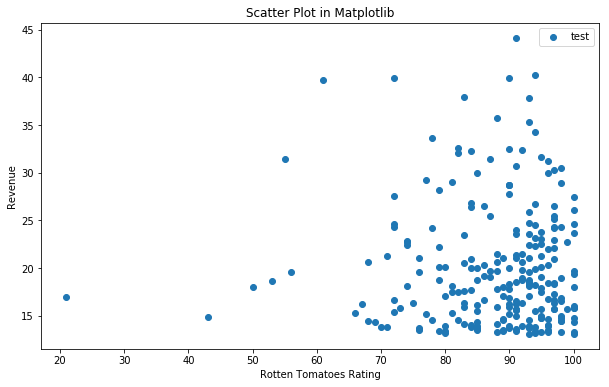

In [48]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
query_tuple = get_movies_table()
#query_tuple = box_office_vote_count()

title = [item[1] for item in query_tuple]
# popu = [item[2] for item in query_tuple]
# re_date = [item[3] for item in query_tuple]
#rt_rating = [item[1] for item in query_tuple]
# vote_avg = [item[5] for item in query_tuple]
# title_length = [len(item) for item in title]
# director = [item[6] for item in query_tuple]
revenue = [item[2] for item in query_tuple]
rt_rating = [item[8] for item in query_tuple]

   
test_list = []
for ind in range(len(vote_count)):
    if rt_rating[ind] != None and revenue[ind] != None:
        test_dict = {'rt_rating': rt_rating[ind],
                     'revenue': revenue[ind]}
        test_list.append(test_dict)

x = []
y = []
for dictionary in test_list:
    y.append(dictionary['revenue'])
    x.append(dictionary['rt_rating'])
    
plt.figure(figsize=(10,6))
plt.scatter(x[10:-10], y[10:-10], label = "test" )
# Set x and y axes lvote_countabels
plt.xlabel('Rotten Tomatoes Rating')
plt.ylabel('Revenue')
print(np.corrcoef(x,y))
plt.title('Scatter Plot in Matplotlib')
plt.legend()
plt.show()


In [68]:
def normalized_vote_count():
    normal_q = """SELECT movies.title, movies.vote_count, AVG(popularity) AS popularity, COUNT(movie_id) AS total_movies, genres.name
                            FROM genre_instances
                            JOIN movies
                            USING(movie_id)
                            JOIN genres
                            USING(genre_id)
                            GROUP BY movie_id
                            HAVING genres.name != 'TV Movie'
                            ORDER BY popularity DESC
                            """
    return execute_query_into_df(normal_q)
normalized_vote_count()

,title,vote_count,popularity,total_movies,name
0,Avengers: Endgame,8151,400.621002,3,Adventure
1,Avengers: Infinity War,14604,108.680000,3,Adventure
2,Inception,22623,79.893997,3,Adventure
3,The Avengers,20110,56.791000,3,Adventure
4,Spider-Man: Into the Spider-Verse,4603,55.090000,5,Adventure
5,How to Train Your Dragon: The Hidden World,2304,50.605000,3,Family
6,The Lord of the Rings: The Fellowship of the Ring,14816,47.206001,3,Adventure
7,Guardians of the Galaxy Vol. 2,12880,44.882999,4,Adventure
8,Thor: Ragnarok,11786,44.716999,4,Adventure
9,Iron Man,16143,44.198002,3,Adventure
